In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from image_extractor import preprocess_hsv, HE

image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (13).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_PartiallyPurple/image (45).JPG'

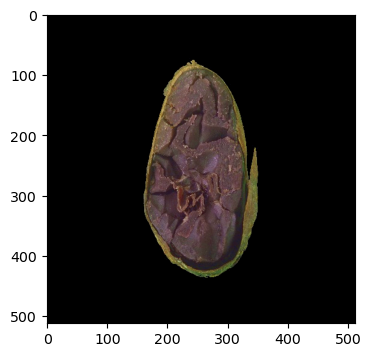

In [2]:
plt.rcParams['figure.dpi'] = 102

image  = cv2.imread(image_dir)
image_hsv = preprocess_hsv(image)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)
plt.show()

(array([  5.,   5.,   9.,  34.,  30.,  39.,  51.,  61.,  75.,  87.,  98.,
         86., 122., 116., 144., 162., 182., 182., 198., 190., 237., 221.,
        219., 245., 278., 278., 263., 236., 228., 287., 223.,   0., 224.,
        245., 234., 226., 208., 206., 228., 198., 239., 194., 230., 269.,
        217., 230., 235., 195., 243., 212., 192., 232., 207., 200., 223.,
        173., 194., 211., 210., 221., 215., 229., 255.,   0., 214., 236.,
        228., 233., 237., 250., 238., 228., 250., 251., 270., 277., 261.,
        254., 263., 250., 276., 274., 261., 254., 266., 258., 274., 257.,
        307., 293., 308., 292., 262., 280., 280.,   0., 265., 272., 275.,
        281., 270., 272., 297., 281., 278., 298., 270., 273., 298., 297.,
        270., 299., 288., 294., 272., 320., 302., 277., 285., 310., 323.,
        303., 289., 296., 285., 293., 314.,   0., 300., 299., 325., 295.,
        281., 296., 292., 303., 295., 288., 287., 292., 273., 302., 318.,
        327., 298., 284., 289., 312., 

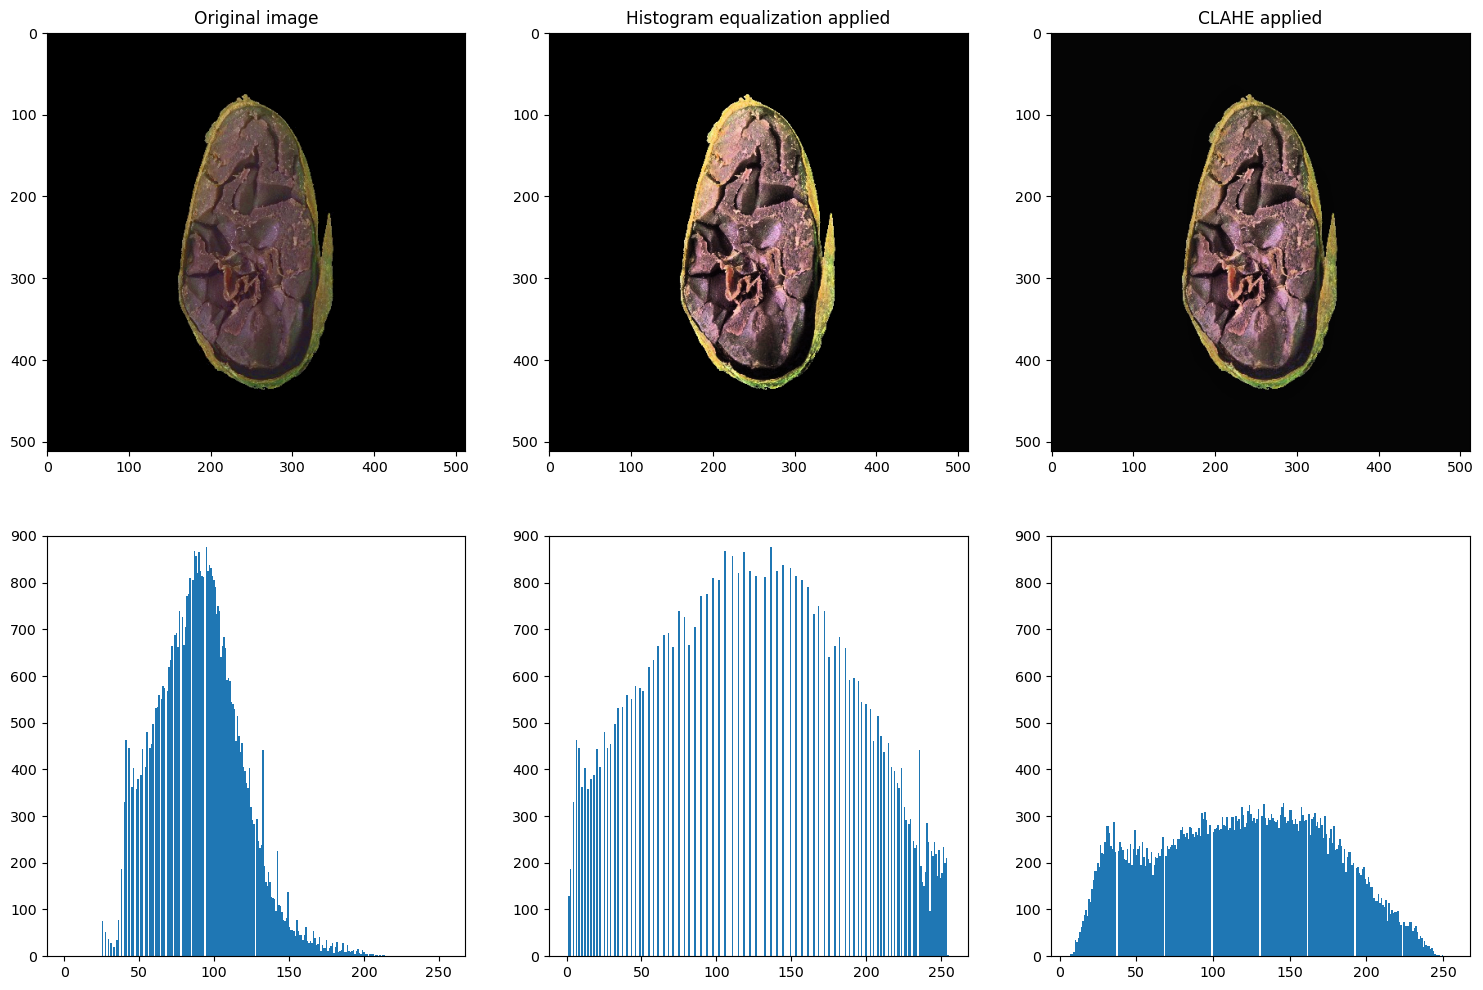

In [28]:
h,s,v = cv2.split(image_hsv)
he = HE(v, grey=True)
clahe_op = cv2.createCLAHE(4, (8,8))
clahe = clahe_op.apply(v)

plt.rcParams["figure.figsize"] = (18,12)

im2 = cv2.merge((h,s,he))
im3 = cv2.merge((h,s,clahe))
im2 = cv2.cvtColor(im2, cv2.COLOR_HSV2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_HSV2RGB)

plt.subplot(2,3,1)
plt.title('Original image')
plt.imshow(image_rgb)
plt.subplot(2,3,4)
plt.ylim([0, 900])
plt.hist(v.ravel(), bins=256, range=(1, 255))
plt.subplot(2,3,2)
plt.title('Histogram equalization applied')
plt.imshow(im2)
plt.subplot(2,3,5)
plt.ylim([0, 900])
plt.hist(he.ravel(), bins=256, range=(1, 255))
plt.subplot(2,3,3)
plt.title('CLAHE applied')
plt.imshow(im3)
plt.subplot(2,3,6)
plt.ylim([0, 900])
plt.hist(clahe.ravel(), bins=256, range=(7, 255))

